# Naive_Bayes

# Q1(Salary)

Prepare a classification model using Naive Bayes for salary data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [20]:
import warnings 
warnings.filterwarnings("ignore")

In [21]:
test = pd.read_csv("SalaryData_Test.csv")
train = pd.read_csv("SalaryData_Train.csv")

In [22]:
test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

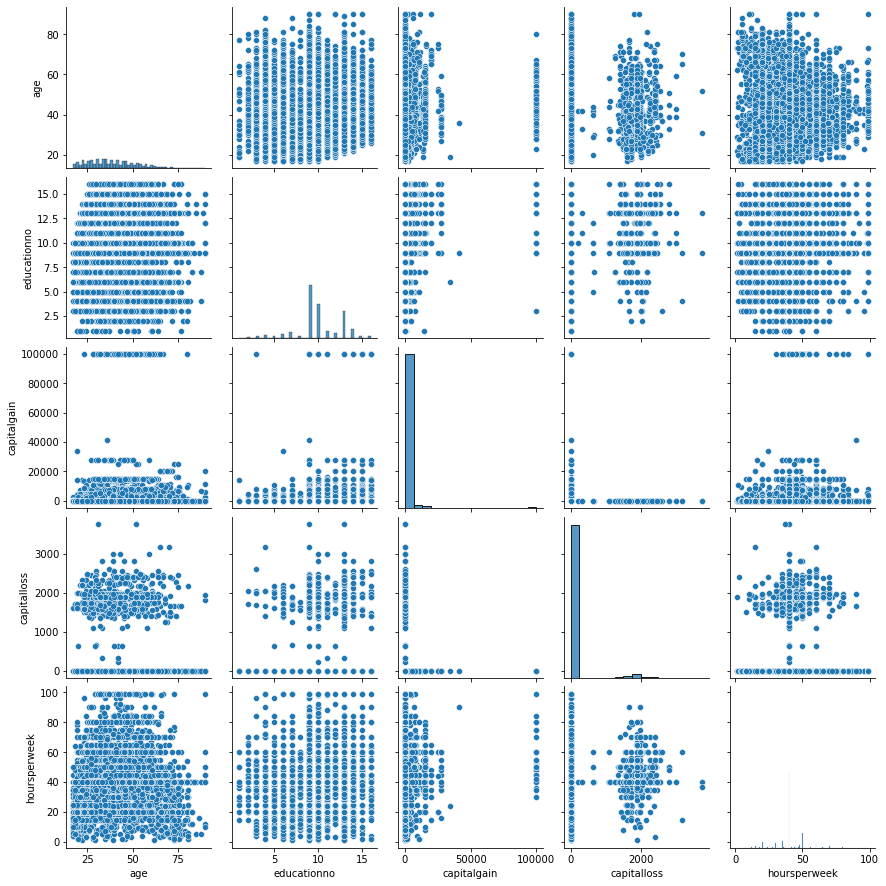

In [23]:
sns.pairplot(test)

In [24]:
train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

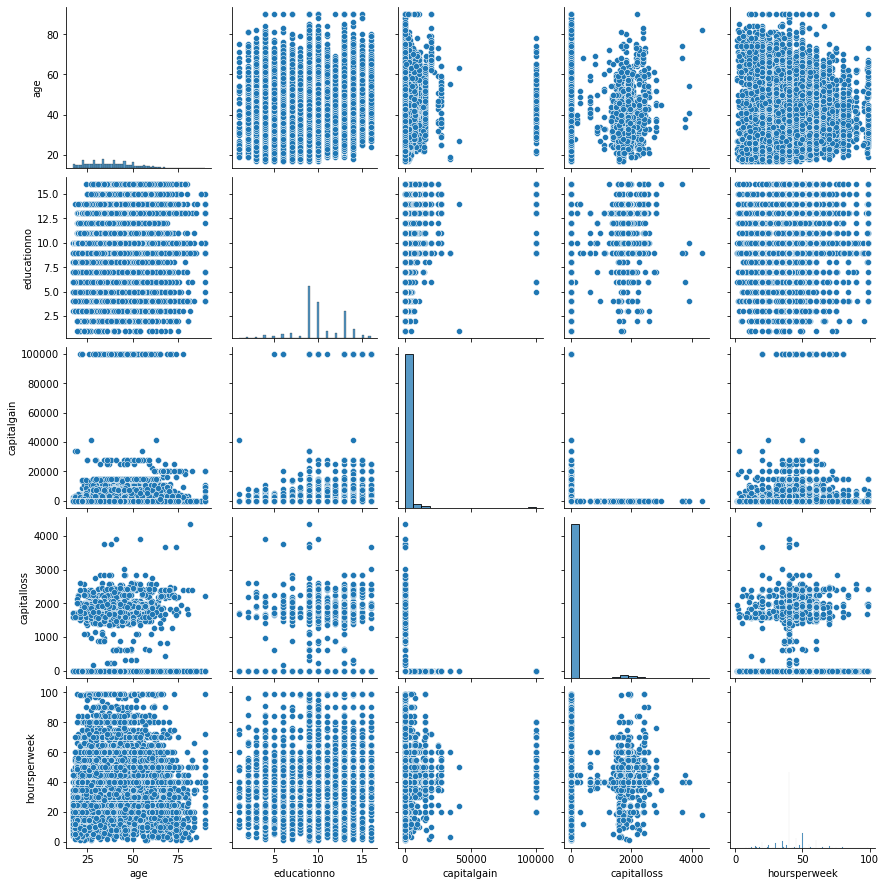

In [25]:
sns.pairplot(train)

In [26]:
# Creating a list for categorical data
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [27]:
# from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [28]:
number = LabelEncoder()
for i in str_c:
    train[i]= number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

# EDA

In [29]:
 train.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0   <=50K  
1   <=50K  
2   <=50K  
3   <=50K  
4   <=50K

In [30]:
test.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   25          2          1            7              4           6   
1   38          2         11            9              2           4   
2   28          1          7           12              2          10   
3   44          2         15           10              2           6   
4   34          2          0            6              4           7   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             3     2    1            0            0            40      37   
1             0     4    1            0            0            50      37   
2             0     4    1            0            0            40      37   
3             0     2    1         7688            0            40      37   
4             1     4    1            0            0            30      37   

   Salary  
0   <=50K  
1   <=50K  
2    >50K  
3    >50K  
4   <=50K

In [31]:
mapping = {' >50K': 1, ' <=50K': 2}

In [32]:
train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})

In [33]:
df = train.append(test) 

In [34]:
df1 = df.copy()

In [35]:
df1.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0       2  
1       2  
2       2  
3       2  
4       2

In [36]:
df1.shape

(45221, 14)

In [37]:
df1.describe().T

count         mean          std   min   25%   50%   75%  \
age            45221.0    38.548086    13.217981  17.0  28.0  37.0  47.0   
workclass      45221.0     2.204507     0.958132   0.0   2.0   2.0   2.0   
education      45221.0    10.313217     3.816992   0.0   9.0  11.0  12.0   
educationno    45221.0    10.118463     2.552909   1.0   9.0  10.0  13.0   
maritalstatus  45221.0     2.585148     1.500460   0.0   2.0   2.0   4.0   
occupation     45221.0     5.969572     4.026444   0.0   2.0   6.0   9.0   
relationship   45221.0     1.412684     1.597242   0.0   0.0   1.0   3.0   
race           45221.0     3.680281     0.832361   0.0   4.0   4.0   4.0   
sex            45221.0     0.675062     0.468357   0.0   0.0   1.0   1.0   
capitalgain    45221.0  1101.454700  7506.511295   0.0   0.0   0.0   0.0   
capitalloss    45221.0    88.548617   404.838249   0.0   0.0   0.0   0.0   
hoursperweek   45221.0    40.938038    12.007640   1.0  40.0  40.0  45.0   
native         45221.0    35.431503     5.931380   0.0  37.0  37.0  37.0   
Salary         45221.0     1.752151     0.431769   1.0   2.0   2.0   2.0   

                   max  
age               90.0  
workclass          6.0  
education         15.0  
educationno       16.0  
maritalstatus      6.0  
occupation        13.0  
relationship       5.0  
race               4.0  
sex                1.0  
capitalgain    99999.0  
capitalloss     4356.0  
hoursperweek      99.0  
native            39.0  
Salary             2.0

In [39]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Finding Correlation

In [40]:
corr = df1.corr()

<AxesSubplot:>

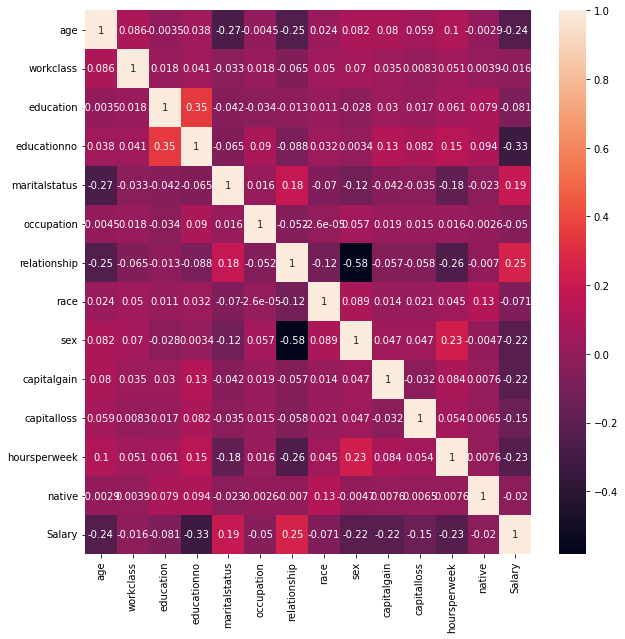

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [44]:
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))

Skew: -0.31062061074424
Kurtosis: 0.6350448194491634


The Data is negatively skewed and has low kurtosis value

# Naive Bayes

In [47]:
x_train = train.iloc[:,0:13]
y_train = train.iloc[:,13]
x_test = test.iloc[:,0:13]
y_test = test.iloc[:,13]

# GaussianNB

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
clsfrgnb = GaussianNB()

In [57]:
clsfrgnb.fit(x_train, y_train)

GaussianNB()

In [58]:
GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB()

In [59]:
y_pred_gnb = clsfrgnb.predict(x_test)

In [60]:
confusion_matrix(y_test, y_pred_gnb)

array([[ 1209,  2491],
       [  601, 10759]], dtype=int64)

In [61]:
pd.crosstab(y_test.values.flatten(),clsfrgnb)

col_0  GaussianNB()
row_0              
1              3700
2             11360

In [62]:
print ("Accuracy",np.mean(y_pred_gnb==y_test.values.flatten()))

Accuracy 0.7946879150066402


# MultinomialNB

In [63]:
clsfrmnb = MultinomialNB()

In [64]:
clsfrmnb.fit(x_train, y_train)

MultinomialNB()

In [65]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [66]:
y_pred_mnb = clsfrmnb.predict(x_test)

In [67]:
confusion_matrix(y_test, y_pred_mnb)

array([[  780,  2920],
       [  469, 10891]], dtype=int64)

In [68]:
pd.crosstab(y_test.values.flatten(),clsfrmnb)

col_0  MultinomialNB()
row_0                 
1                 3700
2                11360

In [69]:
print ("Accuracy",np.mean(y_pred_mnb==y_test.values.flatten()))

Accuracy 0.7749667994687915


GaussianNB Model has a better Accuracy, Thus we will use GaussianNB Classifier